# Titanic Data Analysis - Survival Prediction

**Titanic dataset**, one of the most well-known datasets in the data science community.

To explore the Titanic passenger data and build models that can **predict survival** based on features like age, gender, passenger class, and more.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [2]:
df=pd.read_csv("train.csv");
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# Handling Missing values

In [4]:

a = df[df["Survived"] == 1]
a1 = a[a["Pclass"] == 1]
print(a1['Age'].median()) 

b = df[df["Survived"] == 0]
b1 = b[b["Pclass"] == 1]
print(b1['Age'].median())

c = df[df["Survived"] == 1]
c1 = c[c["Pclass"] == 2]
print(c1['Age'].median())

d = df[df["Survived"] == 0]
d1 = d[d["Pclass"] == 2]
print(d1['Age'].median())

e = df[df["Survived"] == 1]
e1 = e[e["Pclass"] == 3]
print(e1['Age'].median())

f = df[df["Survived"] == 0]
f1 = f[f["Pclass"] == 3]
print(f1['Age'].median())


a = df[df["Survived"] == 1]
a1 = a[a["Pclass"] == 1]
print(a1['Embarked'].mode()[0])  

b = df[df["Survived"] == 0]
b1 = b[b["Pclass"] == 1]
print(b1['Embarked'].mode()[0])

c = df[df["Survived"] == 1]
c1 = c[c["Pclass"] == 2]
print(c1['Embarked'].mode()[0])

d = df[df["Survived"] == 0]
d1 = d[d["Pclass"] == 2]
print(d1['Embarked'].mode()[0])

e = df[df["Survived"] == 1]
e1 = e[e["Pclass"] == 3]
print(e1['Embarked'].mode()[0])

f = df[df["Survived"] == 0]
f1 = f[f["Pclass"] == 3]
print(f1['Embarked'].mode()[0])


35.0
45.25
28.0
30.5
22.0
25.0
S
S
S
S
S
S


In [5]:
df.loc[(df["Survived"] == 1) & (df["Pclass"]==1)&(df["Age"].isna()) , "Age"] = df["Age"].fillna(35.0)
df.loc[(df["Survived"] == 1) & (df["Pclass"]==2)&(df["Age"].isna()) , "Age"] = df["Age"].fillna(28.0)
df.loc[(df["Survived"] == 1) & (df["Pclass"]==3)&(df["Age"].isna()) , "Age"] = df["Age"].fillna(22.0)

df.loc[(df["Survived"] == 0) & (df["Pclass"]==1)&(df["Age"].isna()) , "Age"] = df["Age"].fillna(45.25)
df.loc[(df["Survived"] == 0) & (df["Pclass"]==2)&(df["Age"].isna()) , "Age"] = df["Age"].fillna(30.5)
df.loc[(df["Survived"] == 0) & (df["Pclass"]==3)&(df["Age"].isna()) , "Age"] = df["Age"].fillna(25.0)

df.loc[(df["Survived"] == 1) & (df["Pclass"]==1)&(df["Cabin"].isna()) , "Cabin"] = df["Cabin"].fillna("B96")
df.loc[(df["Survived"] == 1) & (df["Pclass"]==2)&(df["Cabin"].isna()) , "Cabin"] = df["Cabin"].fillna("E101")
df.loc[(df["Survived"] == 1) & (df["Pclass"]==3)&(df["Cabin"].isna()) , "Cabin"] = df["Cabin"].fillna("E121")

df.loc[(df["Survived"] == 0) & (df["Pclass"]==1)&(df["Cabin"].isna()) , "Cabin"] = df["Cabin"].fillna("C124")
df.loc[(df["Survived"] == 0) & (df["Pclass"]==2)&(df["Cabin"].isna()) , "Cabin"] = df["Cabin"].fillna("D")
df.loc[(df["Survived"] == 0) & (df["Pclass"]==3)&(df["Cabin"].isna()) , "Cabin"] = df["Cabin"].fillna("F")
df['Embarked'].fillna("S")


0      S
1      C
2      S
3      S
4      S
      ..
886    S
887    S
888    S
889    C
890    Q
Name: Embarked, Length: 891, dtype: object

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# 1.Total no.of Passengers:891

# 2.Columns/Fields:12

<Axes: xlabel='Survived', ylabel='count'>

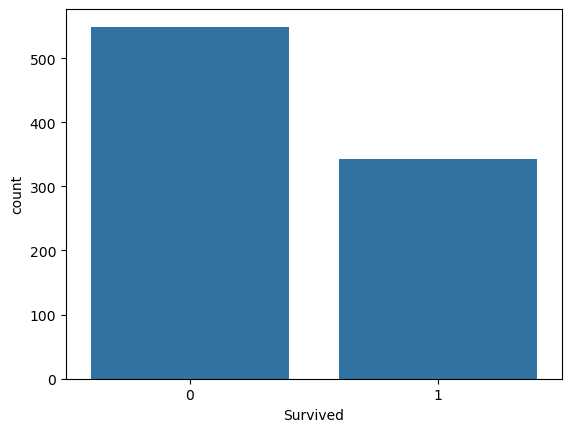

In [7]:
sns.countplot(x="Survived",data=df)

<Axes: xlabel='Pclass', ylabel='count'>

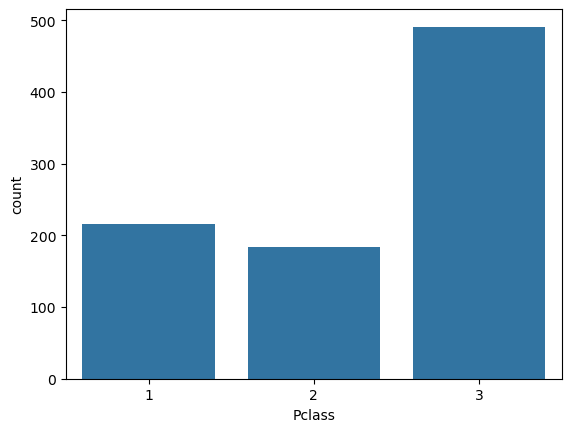

In [8]:
sns.countplot(x="Pclass",data=df)

<Axes: xlabel='Pclass', ylabel='count'>

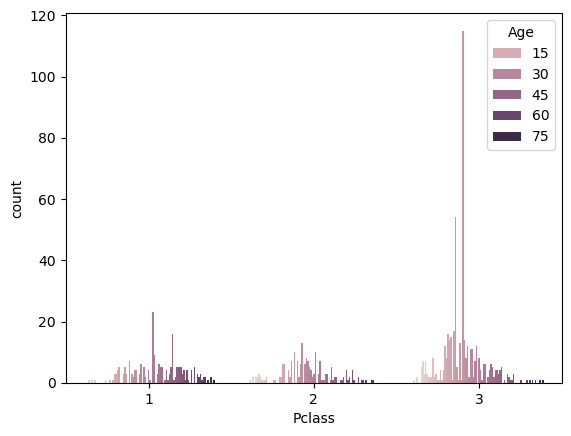

In [9]:
sns.countplot(x="Pclass",hue="Age",data=df)

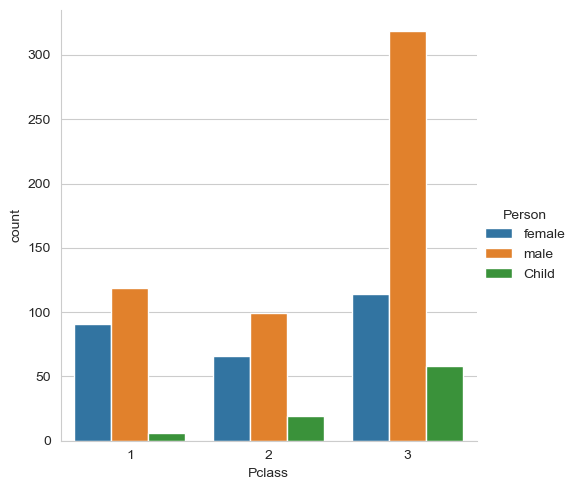

In [10]:
df['Person'] = df['Sex'].copy()
df.loc[df['Age'] < 16, 'Person'] = 'Child'
sns.set_style("whitegrid")
sns.catplot(x='Pclass', data=df, hue='Person', kind='count')
plt.show()

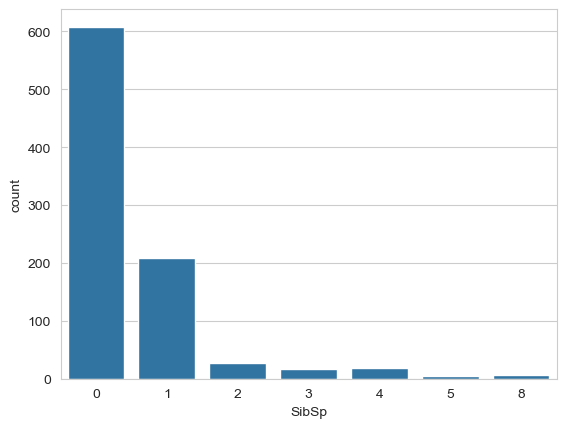

In [11]:
sns.set_style("whitegrid")
sns.countplot(x='SibSp',data=df)
plt.show()

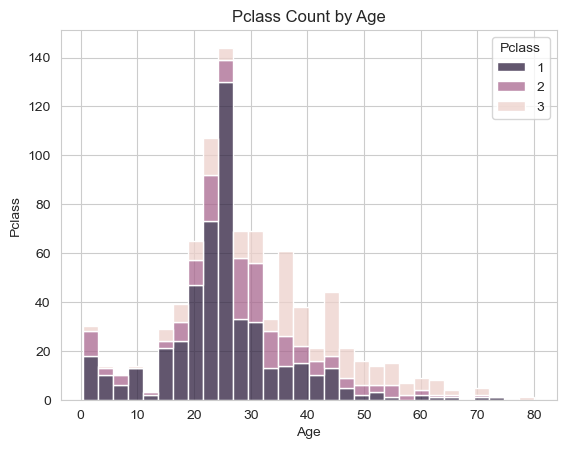

In [12]:

sns.histplot(data=df, x="Age", hue="Pclass", multiple="stack", bins=30)

# Labeling
plt.xlabel("Age")
plt.ylabel("Pclass")
plt.title("Pclass Count by Age")
plt.legend(title="Pclass", labels=["1", "2","3"])

# Show plot
plt.show()

<Axes: xlabel='Pclass', ylabel='count'>

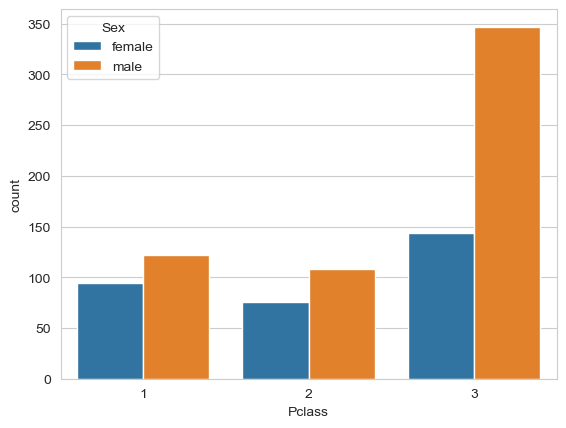

In [13]:
sns.countplot(x="Pclass",hue="Sex", data=df) #hue means with respect to

<Axes: >

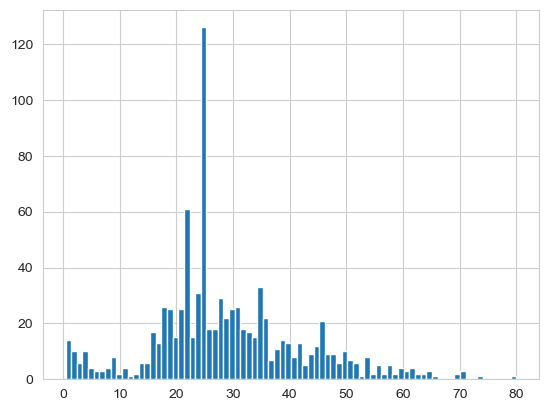

In [14]:
df.Age.hist(bins=80)

<Axes: xlabel='Survived', ylabel='count'>

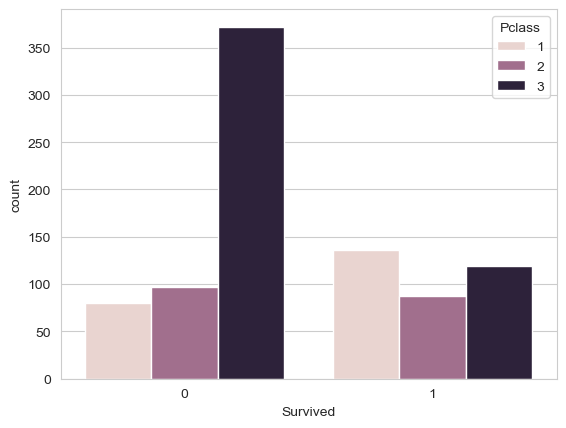

In [15]:
sns.countplot(x="Survived",hue="Pclass",data=df)

<Axes: xlabel='Survived', ylabel='count'>

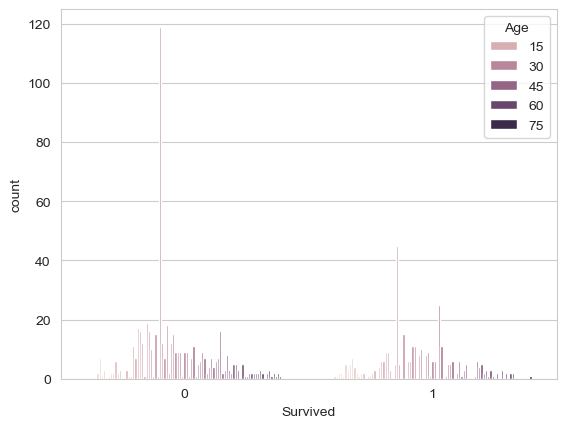

In [16]:
sns.countplot(x="Survived",hue="Age",data=df)

<Axes: xlabel='Survived', ylabel='Count'>

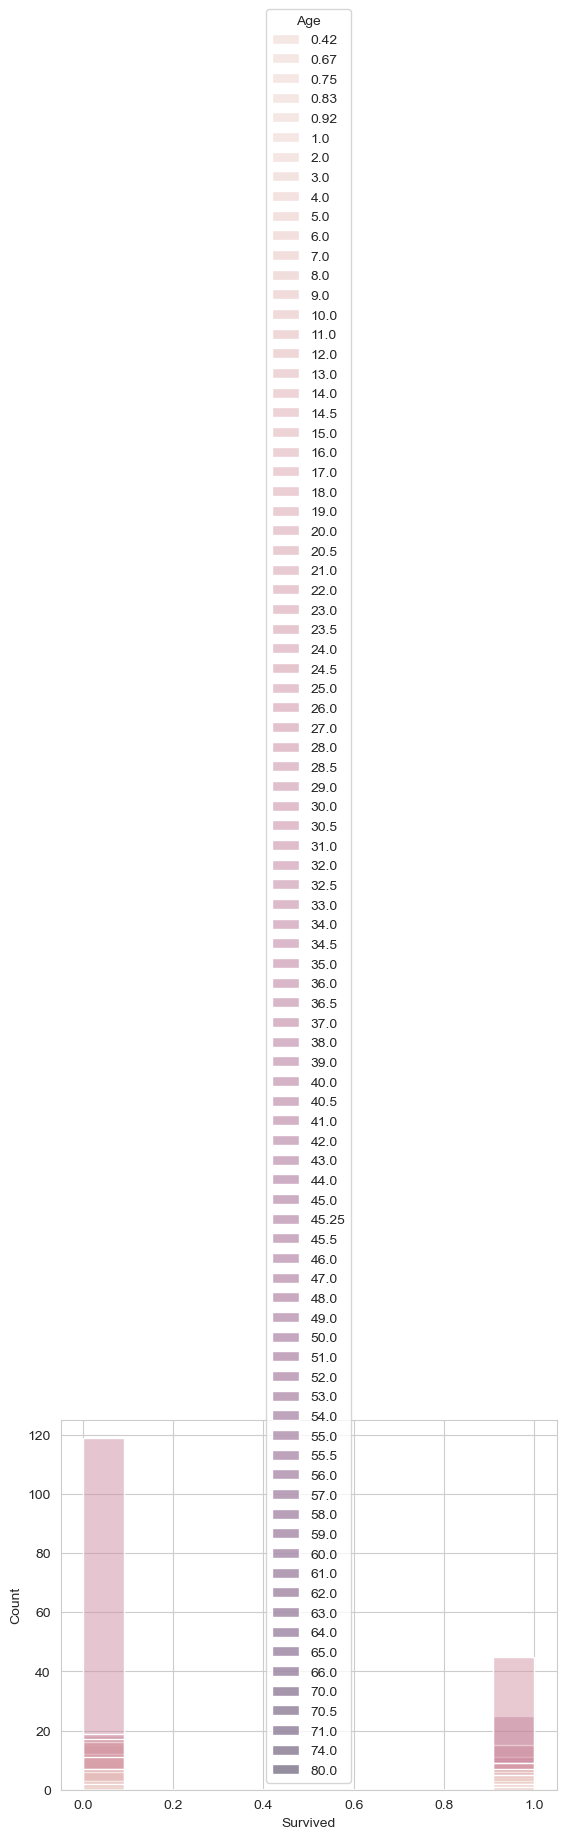

In [17]:
sns.histplot(x="Survived",hue="Age",data=df)

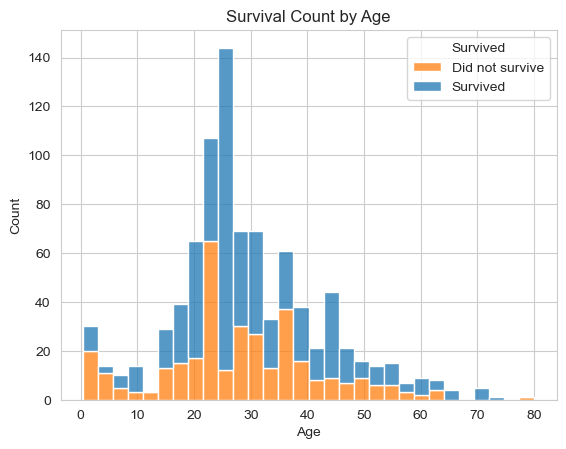

In [18]:

# Create a histogram to show survival distribution by age
sns.histplot(data=df, x="Age", hue="Survived", multiple="stack", bins=30)

# Labeling
plt.xlabel("Age")
plt.ylabel("Count")
plt.title("Survival Count by Age")
plt.legend(title="Survived", labels=["Did not survive", "Survived"])

# Show plot
plt.show()


C:\Users\aslmy\AppData\Local\Temp\ipykernel_12040\2058935547.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x='Cabin', data=cabin_df, kind='count', palette='winter_d')


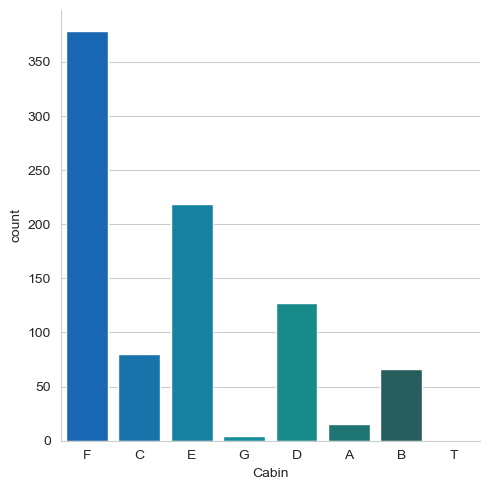

In [19]:
deck = df['Cabin'].dropna()
levels = deck.str[0] 
cabin_df = pd.DataFrame({'Cabin': levels})
sns.set_style("whitegrid")
sns.catplot(x='Cabin', data=cabin_df, kind='count', palette='winter_d')
plt.show()

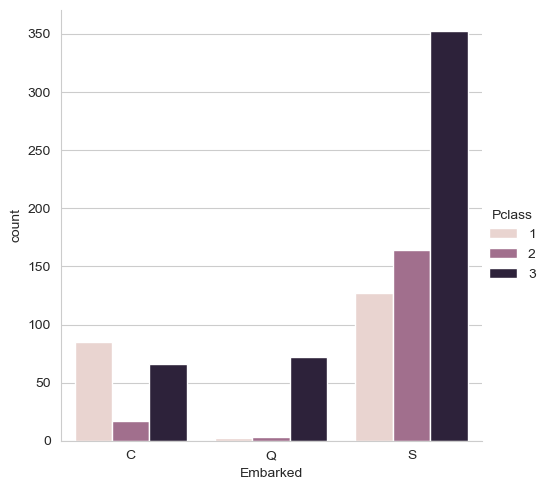

In [20]:
df = df.dropna(subset=['Embarked'])
sns.set_style("whitegrid")
sns.catplot(x='Embarked', data=df, hue='Pclass', kind='count', order=['C', 'Q', 'S'])
plt.show()

C:\Users\aslmy\AppData\Local\Temp\ipykernel_12040\3008419578.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'with Family' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[df['Alone'] > 0, 'Alone'] = 'with Family'
C:\Users\aslmy\AppData\Local\Temp\ipykernel_12040\3008419578.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x='Alone', data=df, kind='count', palette='Blues', order=['Alone', 'with Family'])


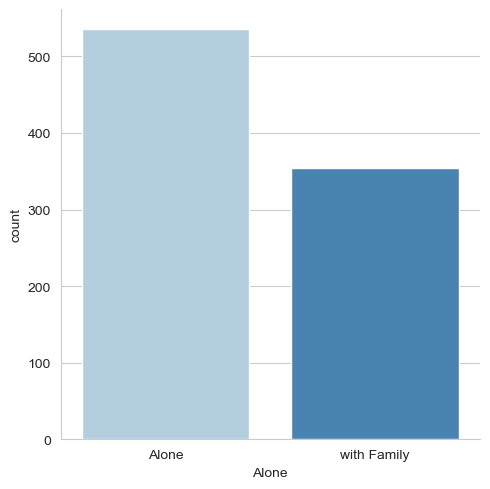

In [21]:
df['Alone'] = df.SibSp + df.Parch
df.loc[df['Alone'] > 0, 'Alone'] = 'with Family'
df.loc[df['Alone'] == 0, 'Alone'] = 'Alone'
sns.set_style("whitegrid")
sns.catplot(x='Alone', data=df, kind='count', palette='Blues', order=['Alone', 'with Family'])
plt.show()

In [22]:
df.Survived.value_counts()

Survived
0    549
1    340
Name: count, dtype: int64

In [23]:
df.Age.value_counts()

Age
25.00    125
22.00     61
35.00     32
24.00     30
28.00     29
        ... 
36.50      1
0.92       1
23.50      1
55.50      1
74.00      1
Name: count, Length: 89, dtype: int64

C:\Users\aslmy\AppData\Local\Temp\ipykernel_12040\3425841524.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Fare'])


<Axes: xlabel='Fare', ylabel='Density'>

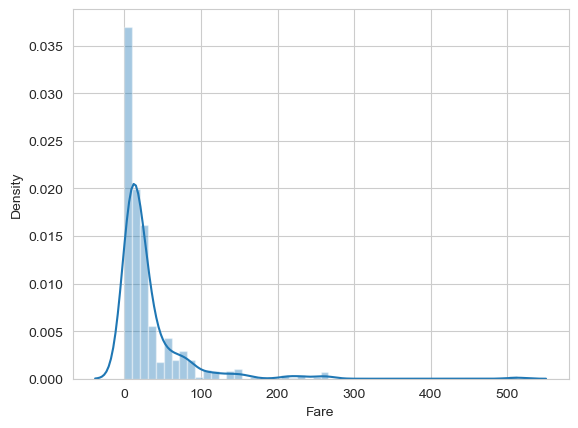

In [24]:
sns.distplot(df['Fare'])

In [25]:
a=df[df["Survived"]==0]
a

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person,Alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,F,S,male,with Family
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,F,S,male,Alone
5,6,0,3,"Moran, Mr. James",male,25.0,0,0,330877,8.4583,F,Q,male,Alone
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,male,Alone
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,F,S,Child,with Family
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,F,S,male,Alone
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,F,Q,female,with Family
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,D,S,male,Alone
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,25.0,1,2,W./C. 6607,23.4500,F,S,female,with Family


# In which Pclass the missing values are more??? in 3rd class 372 members

In [26]:
df.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person,Alone
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,False,False,False,False
887,False,False,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,False,False,False,False,False,False,False,False,False
889,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [27]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
Person         0
Alone          0
dtype: int64

In [28]:
df.dropna(inplace=True)

In [29]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
Person         0
Alone          0
dtype: int64

# Null values are not handled

In [30]:
df.isnull().info()

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   PassengerId  889 non-null    bool 
 1   Survived     889 non-null    bool 
 2   Pclass       889 non-null    bool 
 3   Name         889 non-null    bool 
 4   Sex          889 non-null    bool 
 5   Age          889 non-null    bool 
 6   SibSp        889 non-null    bool 
 7   Parch        889 non-null    bool 
 8   Ticket       889 non-null    bool 
 9   Fare         889 non-null    bool 
 10  Cabin        889 non-null    bool 
 11  Embarked     889 non-null    bool 
 12  Person       889 non-null    bool 
 13  Alone        889 non-null    bool 
dtypes: bool(14)
memory usage: 19.1 KB


# For integers === Machine Learning
# For categorical values === Natural Language Processing
# For images values === Deep learning

In [31]:
sex=pd.get_dummies(df['Sex'])
# this method replaces male with 1 and female with 0

In [32]:
print(sex)

     female   male
0     False   True
1      True  False
2      True  False
3      True  False
4     False   True
..      ...    ...
886   False   True
887    True  False
888    True  False
889   False   True
890   False   True

[889 rows x 2 columns]


In [33]:
print(df['Embarked'])

0      S
1      C
2      S
3      S
4      S
      ..
886    S
887    S
888    S
889    C
890    Q
Name: Embarked, Length: 889, dtype: object


In [34]:
emb=pd.get_dummies(df['Embarked'])

In [35]:
print(emb)

         C      Q      S
0    False  False   True
1     True  False  False
2    False  False   True
3    False  False   True
4    False  False   True
..     ...    ...    ...
886  False  False   True
887  False  False   True
888  False  False   True
889   True  False  False
890  False   True  False

[889 rows x 3 columns]


In [36]:
print(df['Pclass'])

0      3
1      1
2      3
3      1
4      3
      ..
886    2
887    1
888    3
889    1
890    3
Name: Pclass, Length: 889, dtype: int64


In [37]:
pcls=pd.get_dummies(df['Pclass'],prefix="Pclass")

In [38]:
print(pcls)

     Pclass_1  Pclass_2  Pclass_3
0       False     False      True
1        True     False     False
2       False     False      True
3        True     False     False
4       False     False      True
..        ...       ...       ...
886     False      True     False
887      True     False     False
888     False     False      True
889      True     False     False
890     False     False      True

[889 rows x 3 columns]


In [39]:
cab=pd.get_dummies(df['Cabin'],prefix="Cabin")
print(cab)

     Cabin_A10  Cabin_A14  Cabin_A16  Cabin_A19  Cabin_A20  Cabin_A23  \
0        False      False      False      False      False      False   
1        False      False      False      False      False      False   
2        False      False      False      False      False      False   
3        False      False      False      False      False      False   
4        False      False      False      False      False      False   
..         ...        ...        ...        ...        ...        ...   
886      False      False      False      False      False      False   
887      False      False      False      False      False      False   
888      False      False      False      False      False      False   
889      False      False      False      False      False      False   
890      False      False      False      False      False      False   

     Cabin_A24  Cabin_A26  Cabin_A31  Cabin_A32  ...  Cabin_F  Cabin_F E69  \
0        False      False      False      Fal

In [40]:
df.drop(['Pclass','Sex','Embarked'],axis=1,inplace=True)

In [41]:
df=pd.concat([df,sex,emb,pcls,cab],axis=1)

In [42]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Columns: 167 entries, PassengerId to Cabin_T
dtypes: bool(156), float64(2), int64(4), object(5)
memory usage: 218.8+ KB
None


In [43]:
df.drop(['Name','PassengerId','Ticket','Cabin','Alone','Person'],axis=1,inplace=True)

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Columns: 161 entries, Survived to Cabin_T
dtypes: bool(156), float64(2), int64(3)
memory usage: 177.1 KB


In [45]:
df.head(5)

,Survived,Age,SibSp,Parch,Fare,female,male,C,Q,S,...,Cabin_F,Cabin_F E69,Cabin_F G63,Cabin_F G73,Cabin_F2,Cabin_F33,Cabin_F38,Cabin_F4,Cabin_G6,Cabin_T
0,0,22.0,1,0,7.2500,False,True,False,False,True,...,True,False,False,False,False,False,False,False,False,False
1,1,38.0,1,0,71.2833,True,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1,26.0,0,0,7.9250,True,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
3,1,35.0,1,0,53.1000,True,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
4,0,35.0,0,0,8.0500,False,True,False,False,True,...,True,False,False,False,False,False,False,False,False,False


In [46]:
X=df.drop(["Survived"],axis=1)

In [47]:
print(X) #X is Independent variables

      Age  SibSp  Parch     Fare  female   male      C      Q      S  \
0    22.0      1      0   7.2500   False   True  False  False   True   
1    38.0      1      0  71.2833    True  False   True  False  False   
2    26.0      0      0   7.9250    True  False  False  False   True   
3    35.0      1      0  53.1000    True  False  False  False   True   
4    35.0      0      0   8.0500   False   True  False  False   True   
..    ...    ...    ...      ...     ...    ...    ...    ...    ...   
886  27.0      0      0  13.0000   False   True  False  False   True   
887  19.0      0      0  30.0000    True  False  False  False   True   
888  25.0      1      2  23.4500    True  False  False  False   True   
889  26.0      0      0  30.0000   False   True   True  False  False   
890  32.0      0      0   7.7500   False   True  False   True  False   

     Pclass_1  ...  Cabin_F  Cabin_F E69  Cabin_F G63  Cabin_F G73  Cabin_F2  \
0       False  ...     True        False        False  

In [48]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Columns: 160 entries, Age to Cabin_T
dtypes: bool(156), float64(2), int64(2)
memory usage: 170.2 KB


In [49]:
y=df["Survived"] #Targeted Variable is Survived or not(y) variable

In [50]:
print(y) #y is Dependent variable on x

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 889, dtype: int64


In [51]:
from sklearn.model_selection import train_test_split

In [52]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1)

In [53]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 711 entries, 121 to 37
Columns: 160 entries, Age to Cabin_T
dtypes: bool(156), float64(2), int64(2)
memory usage: 136.1 KB


In [54]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 178 entries, 387 to 234
Columns: 160 entries, Age to Cabin_T
dtypes: bool(156), float64(2), int64(2)
memory usage: 34.1 KB


In [55]:
from sklearn.linear_model import LogisticRegression

In [56]:
lm=LogisticRegression(max_iter=10000)

In [57]:
print(lm.fit(X_train,y_train))

LogisticRegression(max_iter=10000)


In [58]:
Predections=lm.predict(X_test)

In [59]:
from sklearn.metrics import classification_report

In [60]:
print(classification_report(y_test,Predections))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       105
           1       0.99      0.96      0.97        73

    accuracy                           0.98       178
   macro avg       0.98      0.97      0.98       178
weighted avg       0.98      0.98      0.98       178



In [61]:
from sklearn.metrics import confusion_matrix

In [62]:
print(confusion_matrix(y_test,Predections))

[[104   1]
 [  3  70]]


In [63]:
from sklearn.metrics import accuracy_score

In [64]:
print(accuracy_score(y_test,Predections)) 

0.9775280898876404


In [65]:
Predections


array([1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0], dtype=int64)